In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

# Оглавление

1. [Введение](#introduction)


2. [Работа с данными](#workwithdata)
    
    2.1 [Обзор датасета](#datasetrewiev)
    
    2.2 [Исследовательский анализ данных](#EDA)
    

3. [Модель прогнозирования оттока](#churnpredictionmodel)

    3.1 [Обучение модели логистической регрессией](#logisticregression)
    
    3.2 [Обучение модели случайным лесом](#randomforest)
    
    3.3 [Сравнение моделей](#comparison)
    
    
4. [Кластеризация](#clustering)


5. [Выводы и рекомендации](#conclusions)


6. [Альтернативный вариант](#altmethod)

## Введение 
<a id="introduction"></a>

Сеть фитнес-центров "Культурист-датасаентист" разрабатывает стратегию взаимодействия с клиентами, целью которой является уменьшение оттока потребителей услуг.

Заказчику необходимы аналитические данные, для подготовки которых необходимо решить следующие задачи:

    - получить исходные данные для работы, открыть их, провести исследовательский анализ данных (EDA);
    
    - построить модель бинарной классификации для прогнозирования оттока клиентов;
    
    - произвести кластеризацию клиентов сети;
    
    - выделить основные группы среди клиентов;
    
    - предложить меры по снижению оттока клиентов, а также рекомендации по особенностям взаимодействия с клиентами из полученных групп.

## Работа с данными 
<a id="workwithdata"></a>

### Обзор датасета 
<a id="datasetrewiev"></a>

Заказчик предоставил для работы csv-файл. Прочитаем файл и изучим его структуру.

In [2]:
fitness_data = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
fitness_data.info()
fitness_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


Таблица состоит из 14 столбцов и 4000 строк. Пропущенные значения отсутствуют. Проверим наличие дубликатов.

In [4]:
fitness_data.duplicated().sum()

0

Дубликаты в таблице отсутствуют.

Датасет представляет из себя таблицу с признаками и целевым показателем. Таблица состоит из 14 столбцов и 4000 строк. В таблице присутствуют катигориальные признаки. В данных не обнаружены пропуски и дубликаты. Исходный данные подходят для работы.  

### Исследовательский анализ данных 
<a id="EDA"></a>

Изучим значения данных в таблице.

In [5]:
fitness_data.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Из данных в таблице видно, что выборка по признаку половой принадлежности, признаку Partner является сбалансированной.

Посмотрим на средние значения признаков для двух целевых групп: тех кто ушел и тех кто остался.

In [6]:
fitness_data.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Наблюдаются существенные отличия в столбцах длительность действующего абонемента и срок до окончания текущего абонемента. Так же предварительно можно сказать, что между этими показателями будет существовать высокая корреляция, т.к. срок до окончания зависит от среднего срока купленного абонемента. 

Большая разница заметна в признаке время с начала посещений фитнесс-клуба. Столбцы посещений групповых занятий и суммарная выручка от других услуг указывают на различия между группами.

Можно сделать предварительные выводы о том, что больше склонны к оттоку клиенты, не являющиеся сотрудниками организации-партнера, купившие месячный абонемент, впервые пришедшие в данный фитнесс-центр. Такие клиенты реже посещают групповые занятия и меньше тратят денег на сопутствующие услуги и товары.  

Построим распределения значений признаков для оттекших и оставшихся клиентов

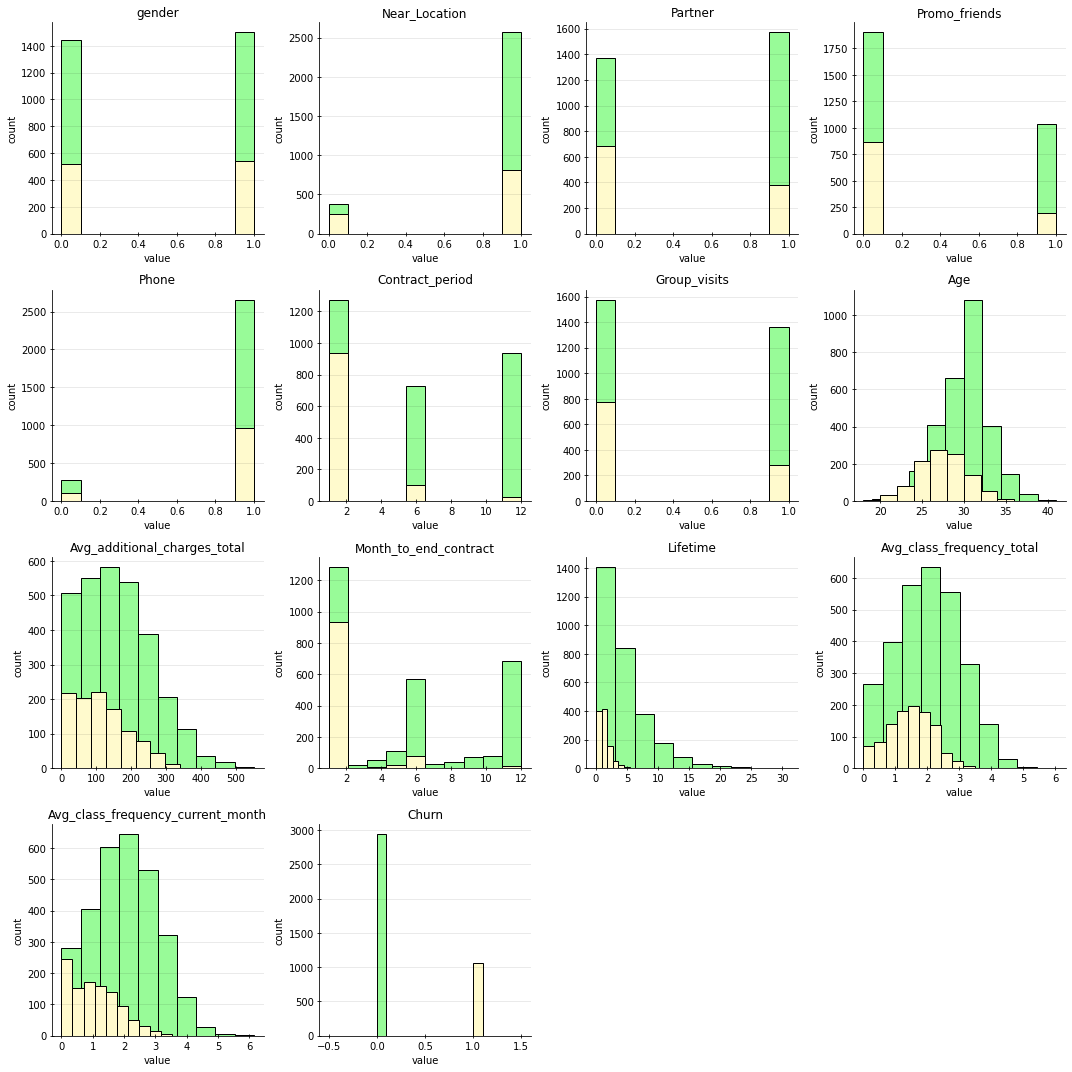

In [7]:
plt.figure(figsize=(15,15))
for x,y in enumerate(fitness_data.columns):
    plt.subplot(4,4,x+1)
    plt.hist(fitness_data.query('Churn == 0')[y], color = 'palegreen', histtype='bar', ec='black', bins=10)
    plt.hist(fitness_data.query('Churn == 1')[y], color = 'lemonchiffon', histtype='bar', ec='black', bins=10)
    plt.title(y)
    plt.grid(color='black', alpha = 0.1, axis = 'y')
    plt.xlabel('value')
    plt.ylabel('count')
    sns.despine()
    plt.tick_params(direction='inout')
    plt.tight_layout()

Построим и отобразим матрицу корреляций

In [8]:
fitness_data.corr()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


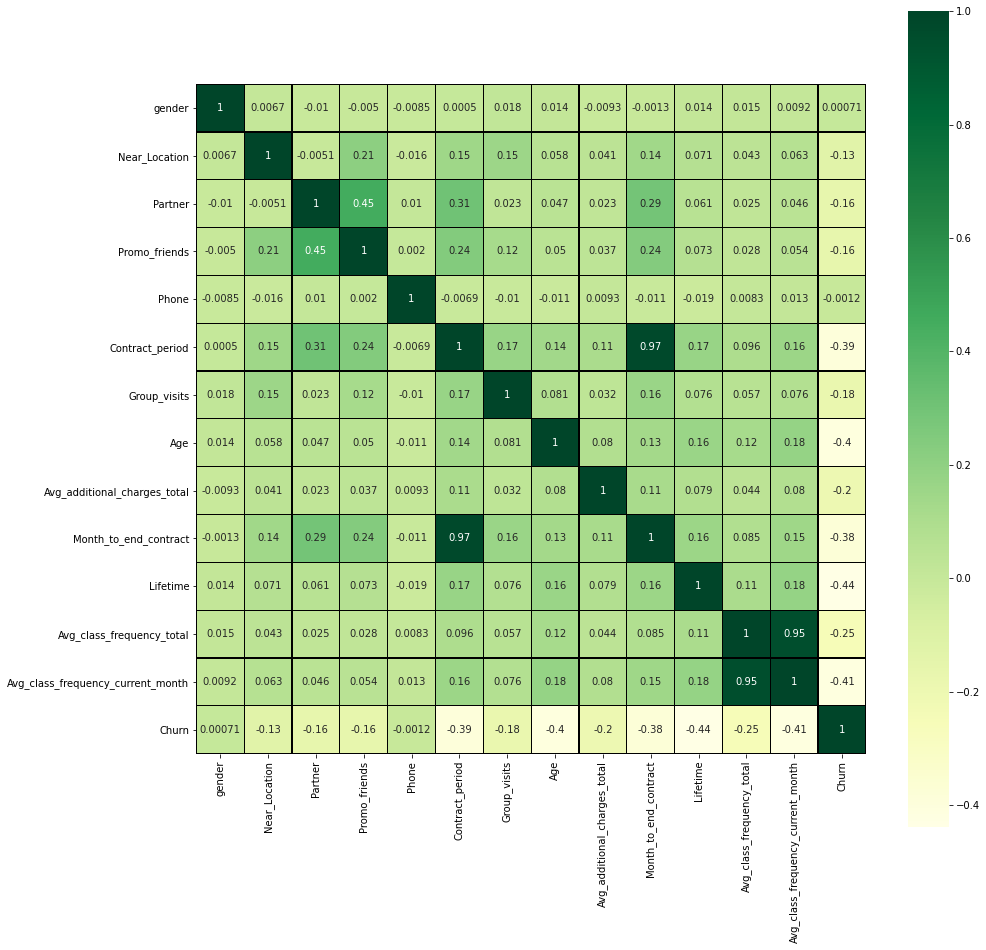

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(fitness_data.corr(), annot=True, square=True, cmap="YlGn", linecolor='black',linewidths=0.2)
plt.show()

Как и предполагалось между величинами количества месяцев до окончания абонемента и продолжительностью абонемента существует сильная корреляция.

Так же высокое значение корреляции обнаружилось между признаками среднего количества посещений групповых занятий в текущем месяце и среднего количества посещений групповых занятий за все время.

Корреляция целевого признака с остальными слабая.

## Модель прогнозирования оттока клиентов
<a id="churnpredictionmodel"></a>

Построим модель бинарной классификации, где целевой признак - факт оттока клиента в следующем месяце.

Разобъем выборку на обучающую и валидационную части.

In [10]:
X = fitness_data.drop('Churn', axis=1)
y = fitness_data['Churn']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Обучение модели логистической регрессией
<a id="logisticregression"></a>

In [12]:
#Задаем модель
model_lr = LogisticRegression(solver='liblinear', random_state = 0)
#Обучаем модель
model_lr.fit(X_train, y_train)
#Рассчитываем прогнозируемые значения
lr_predict = model_lr.predict(X_test)
#Рассчитываем вектор вероятностей отнесения к классу 1
lr_proba = model_lr.predict_proba(X_test)[:,1]

### Обучение модели случайным лесом
<a id="randomforest"></a>

In [13]:
# Зададим алгоритм для модели
model_rf = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# Обучаем модель
model_rf.fit(X_train, y_train)
#Рассчитываем прогнозируемые значения
rf_predict = model_rf.predict(X_test)
#Рассчитываем вектор вероятностей отнесения к классу 1
rf_proba = model_rf.predict_proba(X_test)[:,1]

### Сравнение моделей
<a id="comparison"></a>

Выведем метрики accuracy, precision и recall для построенных моделей.

In [14]:
print('Сравнение метрик')
print('Linear regression accuracy {:.2f} | Random forest accuracy {:.2f}'
      .format(accuracy_score(y_test, lr_predict), accuracy_score(y_test, rf_predict)))
print('Linear regression precision {:.2f} | Random forest precision {:.2f}'
      .format(precision_score(y_test, lr_predict), precision_score(y_test, rf_predict)))
print('Linear regression recall {:.2f} | Random forest recall {:.2f}'
      .format(recall_score(y_test, lr_predict), recall_score(y_test, rf_predict)))

Сравнение метрик
Linear regression accuracy 0.93 | Random forest accuracy 0.92
Linear regression precision 0.86 | Random forest precision 0.84
Linear regression recall 0.83 | Random forest recall 0.82


По результатам сравнения лучше себя демонстрирует модель линейной регрессии , у которой все три показателя имеют более высокие значения. Модель, построенная на основе алгоритма линейной регрессии, показывает более высокую долю правильных ответов, так же выше оценки полноты и точности.

## Кластеризация клиентов
<a id='clustering'></a>

Проведем стандартизацию выборки.

In [15]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward') 

Нарисуем дендрограмму на основе нормализованных данных.

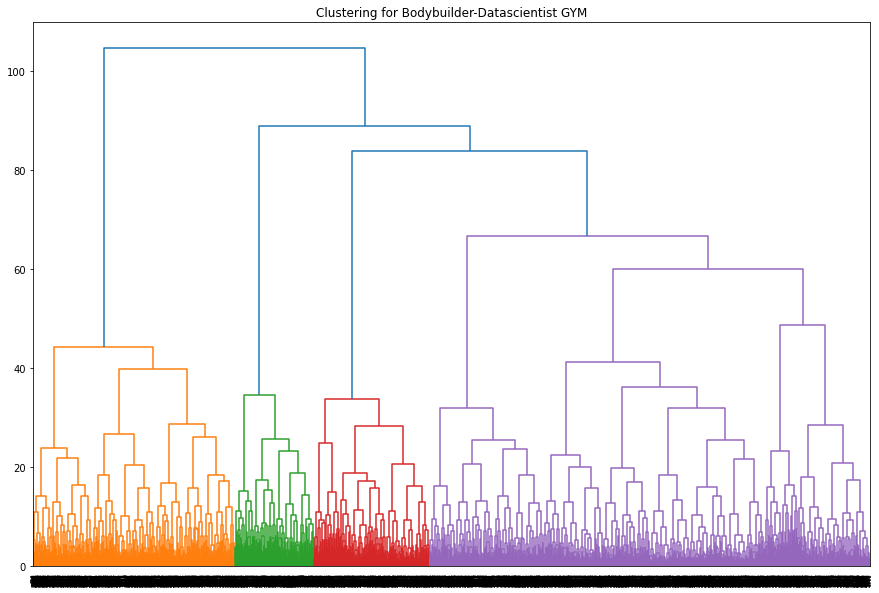

In [16]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Clustering for Bodybuilder-Datascientist GYM')
plt.show() 

На дендрограмме выделяется 4 класса. Можно предположить, что в нашей выборке присутствует 4 класса, но для обучения модели по алгоритму K-means выберем цифру 5, из условий проекта.

In [17]:
#Зададим алгоритм
km = KMeans(n_clusters = 5, random_state=0)
#Прогнозируем кластеры для наблюдений
labels = km.fit_predict(X_sc)
#Сохраняем значения кластеров в датасет
fitness_data['cluster_km'] = labels

Сгруппируем таблицу по средним значениям признаков для каждого кластера

In [18]:
fitness_data.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019


Из таблицы со средними значениями признаков можно выделить 2 сегмента с низкой вероятностью оттока: это сегменты 4 и 0. Разберем их подробнее.

Сегмент 4: преобладание одного из полов, недолгосрочные абонементы на 1 и 6 месяцев с преобладанием месячных, самые высокие затраты на сопутствующие услуги, высокая средняя продолжительность посещения данного фитнес-зала примерно 5 месяцев, невысокая продолжительность абонемента. **Клиенты из этой категории скорее всего покупают непродолжительный абонемент для пробы, а затем приобретают повторный и продолжают занятия.**

Сегмент 0: высокая доля клиентов из партнерских организаций, более половины пришли в рамках промо-акции пригласи друга, высокая средняя продолжительность действующего абонемента - много годовых, высокие затраты на сопутствующие услуги, высокая средняя продолжительность посещений. **Клиенты из этой категории приходят по приглашению коллег с работы и сразу покупают продолжительные абонементы.**

Наблюдается один промежуточный сегмент с вероятностью оттока на уровне 27% - это класс 1: высокое число клиентов из организаций-партнеров, около трети пришли по промо-акции, преобладают потребители с 6-месячными абонементами, продолжительность занятий выше среднего - почти 4 месяца. **Для клиентов данной категории близки величины оттекших и пришедших по промо-акции с другом. Возможно в этой категории присутствуют типы людей пришедших за компанию, но без интереса к занятиям.**

Наблюдаем 2 сегмента, потребители в которых подвержены оттоку.

Сегмента 2: Сразу можно выделить, что в нем находятся только посетители не живущие или работающие в районе фитнесс-центра. **Скорее всего отток в данной категории связан с неудобством посещения рассматриваемого фитнесс-центра.**

Сегмент 3: В данной категории можно выделить самую низкую средную продолжительность абонемента, самую низкую среднюю продолжительность посещения и самые низкие затраты на дополнительные услуги. **В этой группе самая высокая доля оттока, признаки говорят о том, что в данной категории возможно много посетителей далеких от фитнеса, решивших попробовать.**

In [19]:
fitness_data.groupby('cluster_km').mean().loc[0,:]

gender                                 0.502970
Near_Location                          0.959406
Partner                                0.783168
Promo_friends                          0.574257
Phone                                  1.000000
Contract_period                       10.889109
Group_visits                           0.542574
Age                                   29.982178
Avg_additional_charges_total         160.761016
Month_to_end_contract                  9.954455
Lifetime                               4.736634
Avg_class_frequency_total              1.982055
Avg_class_frequency_current_month      1.974789
Churn                                  0.027723
Name: 0, dtype: float64

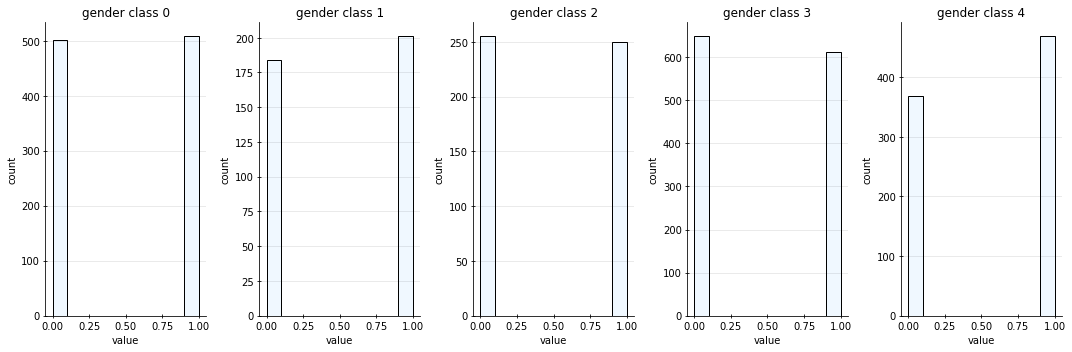

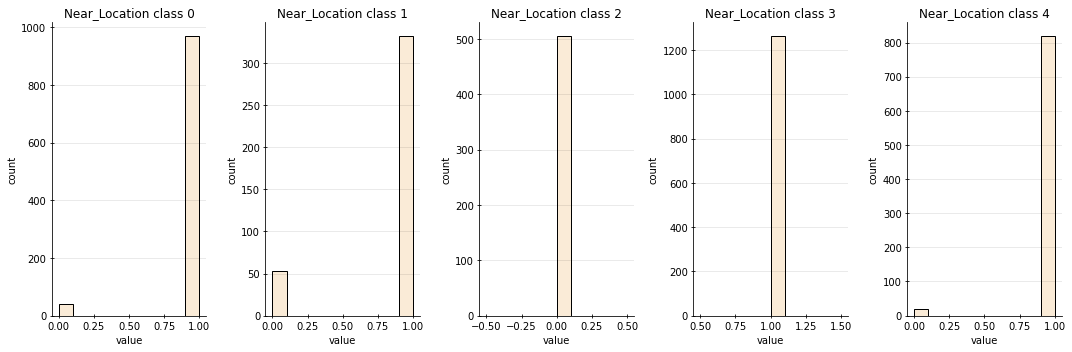

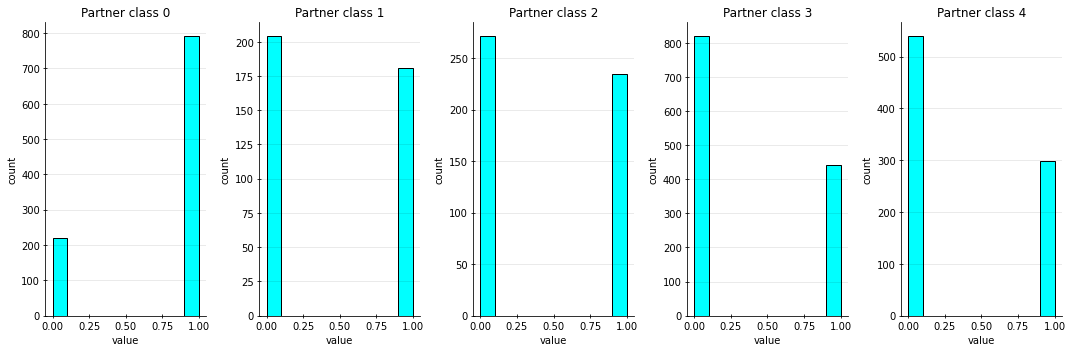

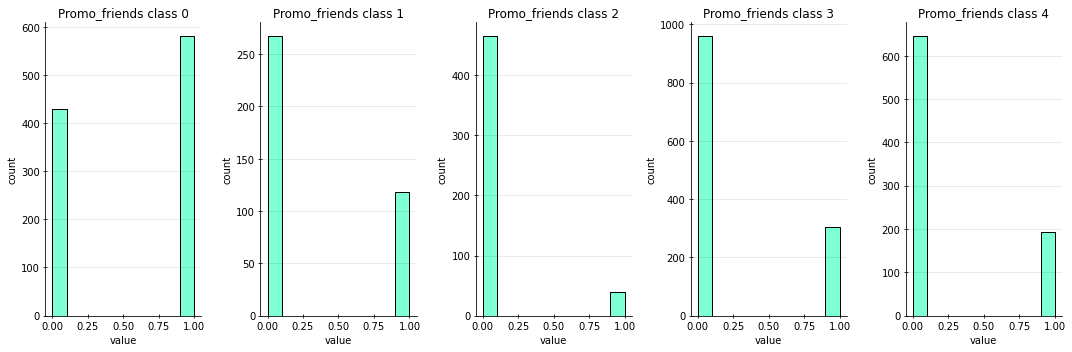

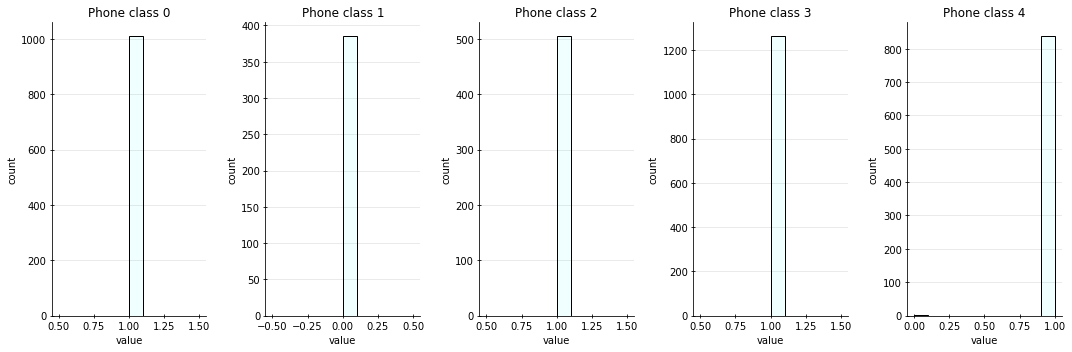

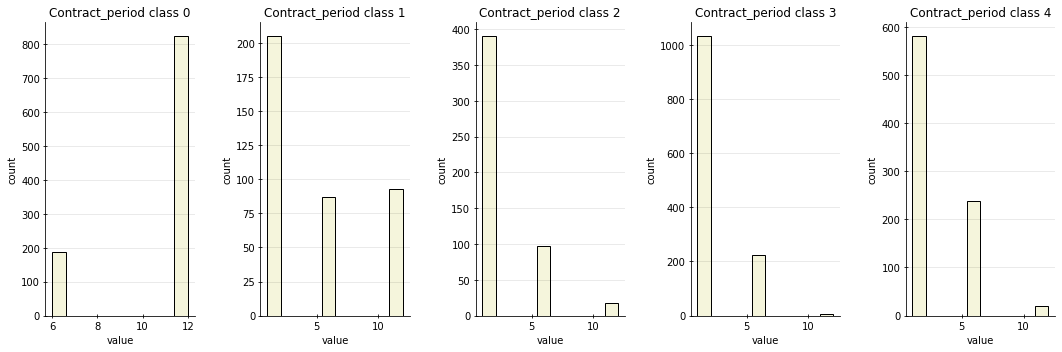

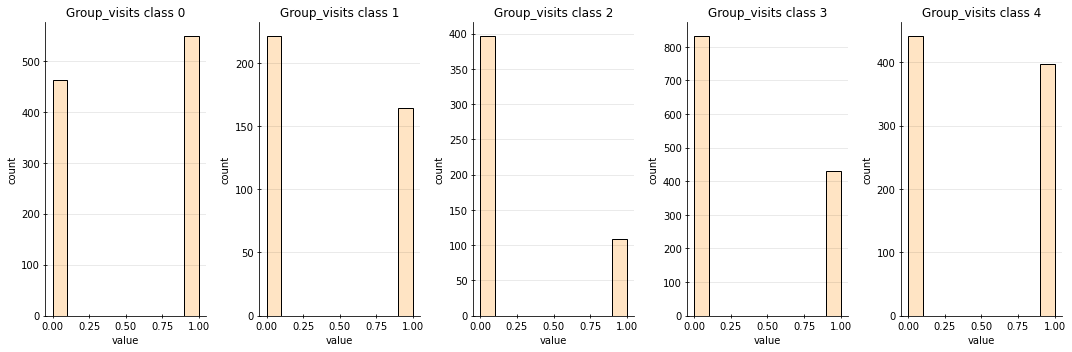

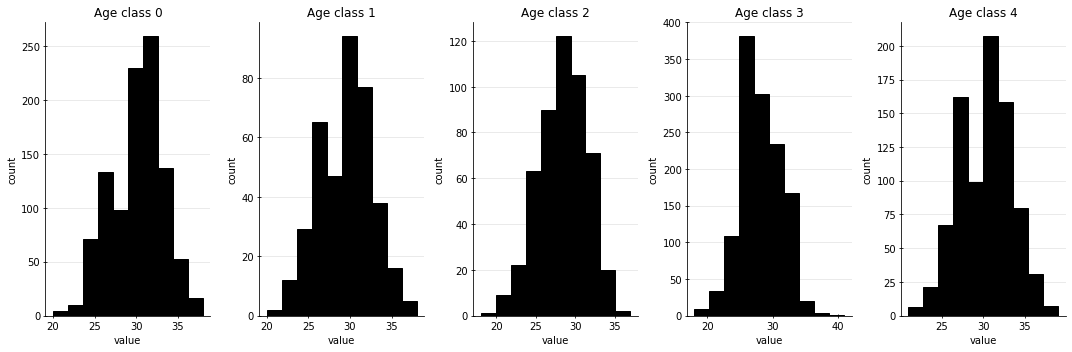

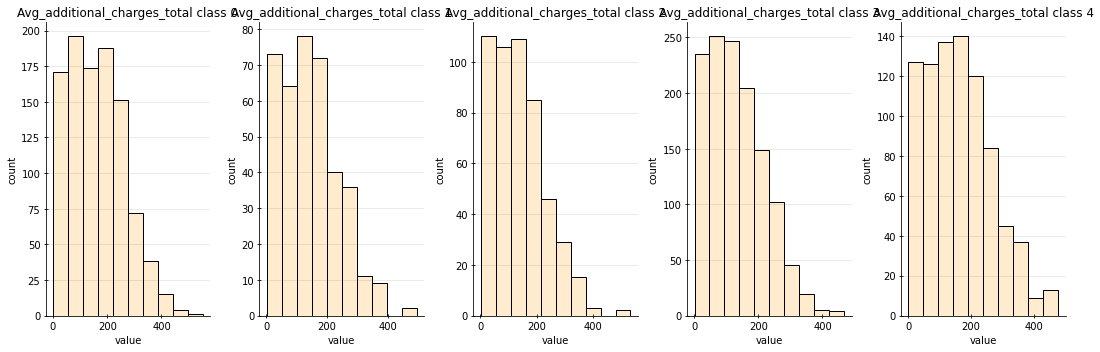

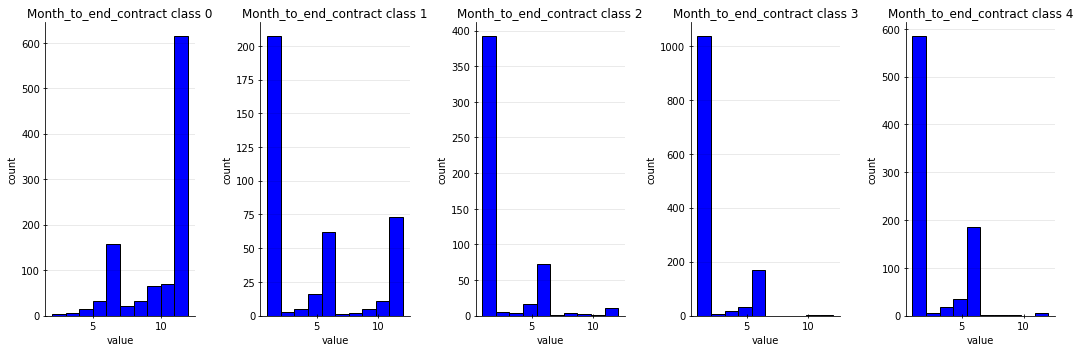

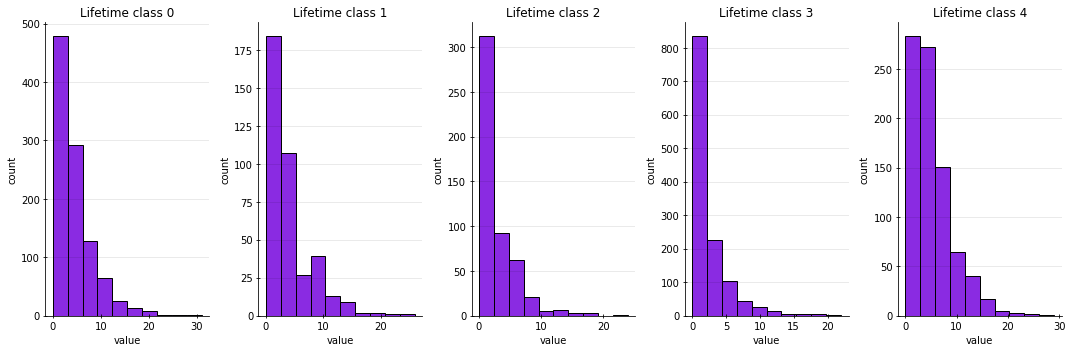

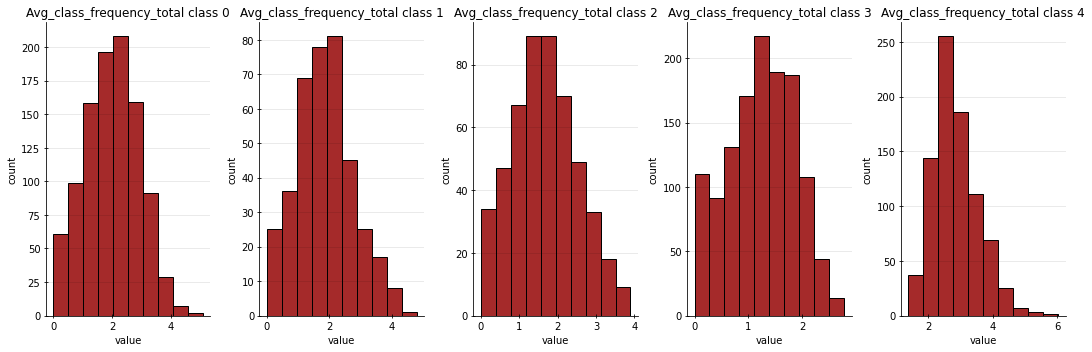

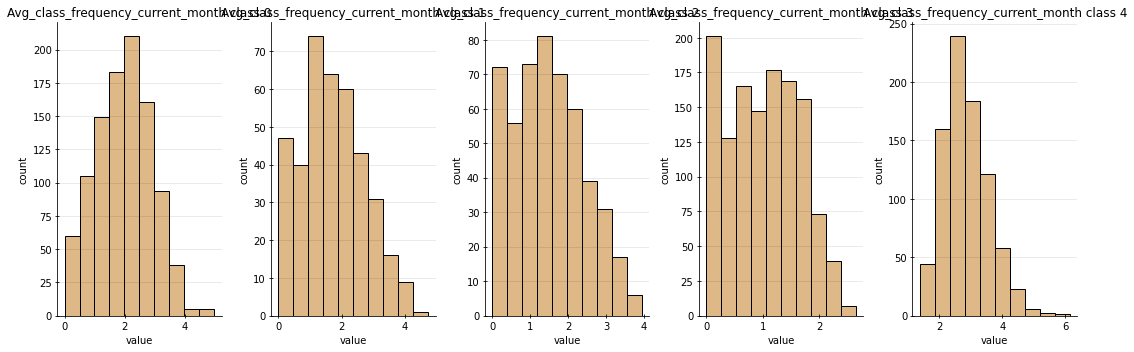

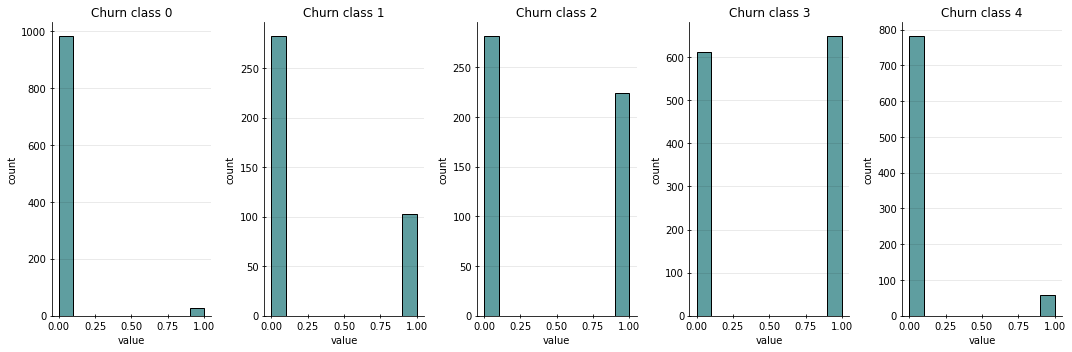

In [20]:
color_list = ['aliceblue',
                'antiquewhite',
                'aqua',
                'aquamarine',
                'azure',
                'beige',
                'bisque',
                'black',
                'blanchedalmond',
                'blue',
                'blueviolet',
                'brown',
                'burlywood',
                'cadetblue',
                'chartreuse']
for color,x in enumerate(fitness_data.groupby('cluster_km').mean().columns):
    fig, ax = plt.subplots(1,5,figsize=(15,5))
    for y in fitness_data.groupby('cluster_km').mean().index:
        ax[y].hist(fitness_data.query('cluster_km == @y')[x], histtype='bar', ec='black', bins=10, color=color_list[color])
        ax[y].set_title('{} class {}'.format(x,y))
        ax[y].grid(color='black', alpha = 0.1, axis = 'y')
        plt.tight_layout()
        ax[y].set_xlabel('value')
        ax[y].set_ylabel('count')
        sns.despine()
        ax[y].tick_params(direction='inout')

## Выводы и рекомендации
<a id='conclusions'></a>

**_Выводы:_**

**1. Модель оттока клиентов** была построена двумя способами: алгоритмом линейной регрессии и случайным лесом. Модель линейной регрессии показала более высокие значения метрик оценивания и является предпочтительной для прогнозирования оттока клиентов.

**2. Кластеризация клиентов** , проведенная с использованием алгоритма K-means, позволила выделить 5 кластеров посетителей фитнес-центра.

**3. Среди выделенных классов:** 

 * Присутствуют 2 сегмента с низкой величиной оттока: сегменты 0 и 4, для которых величины оттока составляют около 3 и 7 процентов.
 
       
     - Для сегмента 0 характерна высокая величина приглашенных клиентов и клиентов из партнерских организаций. Преобладают годовые абонементы.

      - Сегмент 4 отличается высоким числом месячных абонементов. При этом отмечается высокая продолжительность посещения данного фитнес-центра.

  * Сегмент 1 имеет промежуточную для выделенных классов величину оттока около 27 процентов. Для данного класса выделяется выше среднего продолжительность посещения фитнеса, примерно 4 месяца. Высокая доля клиентво с 6 месячными аббонементами. Количество оттекших клиентов находится на уровне близком к количеству пришедших по промо акции "приведи друга".


  * У сегментов 3 и 2 величины оттока составляют 51 и 44 процента. В данных кластерах величины показателя средней частоты посещения групповых занятий в неделю и в месяц ниже, чем у трех остальных, как и сама доля посещающих групповые занятия.


       - Сегмент посетителей 2 имеет существенное отличие от всех остальных кластеров - все представители данного класса не живут и не работают в районе расположения фитнес-центра.
       
       - Сегмент 3 - класс с самой высокой величиной показателя оттока. В данной категории потребителей услуг можно выделить самую низкую средную продолжительность абонемента, самую низкую среднюю продолжительность посещения и самые низкие затраты на дополнительные услуги. При этом наблюдается самая высокая величина оттока.
       
**_Рекомендации:_**

1. Снизить отток в сегменте 1 путем увеличения средней продолжительности абонемента. Для акции "приведи друга" ввести условие предоставления скидки при покупке абонемента на 6 месяцев и больше. 
    

2. Для компенсации неудобств сегмента 2 от местоположения ввести "ночные" абонементы с дисконтом к основным. Такой абонемент будет позволять посещать фитнес-центр с 21:00 до 09:00, позволяя добираться потребителям из других районов избегая пика трафика.
    

3. Увеличить удержание посетителей, которые приходят "за компанию" можно путем привлечения их к групповым занятиям. Для всех посетителей, которые впервые купили абонемент или пришли по акции приведи друга, сделать бесплатным посещение одного группового занятия в выбранном направлении.
 
 
4. Необходимо стимулировать потребление сопутствующих услуг и товаров, предлагая выгодные условия. Такой подход способен увеличить удержание клиентов, которым фитнес не слишком интересен. Должны быть предусмотрены абонементы, предоставляющие определенное количество единиц дополнительных услуг, интересующих пользователя. Цена на такие абонементы должна содержать в себе скидку на предоставляемые услуги.
    
    
5. Попытаться снизить отток путем предложения выгодных условий при продлении абонемента с месячного сразу до годового.
    
    
6. Ввести информационную рассылку для клиентов, которые не заморозили абонемент, но уже не посещают занятия более пяти дней. В рассылке предлагается бесплатная заморозка абонемента на неделю. Клиентам, которые согласились на заморозку, отправлять повторное сообщение за 2 дня до конца заморозки с промокодом на скидку на предлагаемую центром любую платную услугу.

## Альтернативный вариант
<a id='altmethod'></a>

Проведем обучение модели предсказания оттока и кластеризации учитывая полученные в разделе исследовательского анализа данных выводы.

Удалим коррелирующие между собой столбцы и стандартизируем выборки.

В разделе кластеризации установим количество кластеров равное четырем, как изображено на дендрограмме.

Удалим из признаков количество месяцев до окончания контракта и среднее число посещений групповых занятий в последнем месяце. 

In [21]:
X_2 = fitness_data.drop(['Churn', 'Avg_class_frequency_current_month', 'Month_to_end_contract', 'cluster_km'], axis=1)
y_2 = fitness_data['Churn']

In [22]:
X_2

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Lifetime,Avg_class_frequency_total
0,1,1,1,1,0,6,1,29,14.227470,3,0.020398
1,0,1,0,0,1,12,1,31,113.202938,7,1.922936
2,0,1,1,0,1,1,0,28,129.448479,2,1.859098
3,0,1,1,1,1,12,1,33,62.669863,2,3.205633
4,1,1,1,1,1,1,0,26,198.362265,3,1.113884
...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,8,2.284497
3996,0,1,0,0,1,1,1,29,68.883764,1,1.277168
3997,1,1,1,1,1,12,0,28,78.250542,2,2.786146
3998,0,1,1,1,1,6,0,32,61.912657,3,1.630108


Произвем стандартизацию признаков

Разбиваем стандартизированную выборку на обучающую и валидационную

In [23]:
X_2train, X_2test, y_2train, y_2test = train_test_split(X_2, y_2, test_size = 0.2, random_state = 0)

In [24]:
#Обучаем StandartScaler на обучающей выборке
sc2 = StandardScaler()
sc2.fit(X_2train)

StandardScaler()

Преобразуем обучающий и валидационный наборы данных

In [25]:
X_2train_st = sc2.transform(X_2train)
X_2test_st = sc2.transform(X_2test)

In [26]:
#Задаем алгоритм
model_lr_2 = LogisticRegression(solver='liblinear', random_state = 0)
#Обучаем модель
model_lr_2.fit(X_2train_st, y_2train)
#Рассчитываем прогнозируемые значения
lr_predict_2 = model_lr_2.predict(X_2test_st)
#Рассчитываем вектор вероятностей отнесения к классу 1
lr_proba_2 = model_lr_2.predict_proba(X_2test_st)[:,1]

Повторим предыдущие шаги с алгоритмом случайного леса

In [27]:
# Зададим алгоритм для модели
model_rf_2 = RandomForestClassifier(n_estimators = 100, random_state = 0) # Ваш код здесь
# Обучаем модель
model_rf_2.fit(X_2train_st, y_2train)
#Рассчитываем прогнозируемые значения
rf_predict_2 = model_rf_2.predict(X_2test_st)
#Рассчитываем вектор вероятностей отнесения к классу 1
rf_proba_2 = model_rf_2.predict_proba(X_2test_st)[:,1]

Произведем сравнение моделей

In [28]:
print('Сравнение метрик')
print('Linear regression accuracy {:.2f} | Random forest accuracy {:.2f}'
      .format(accuracy_score(y_2test, lr_predict_2), accuracy_score(y_2test, rf_predict_2)))
print('Linear regression precision {:.2f} | Random forest precision {:.2f}'
      .format(precision_score(y_2test, lr_predict_2), precision_score(y_2test, rf_predict_2)))
print('Linear regression recall {:.2f} | Random forest recall {:.2f}'
      .format(recall_score(y_2test, lr_predict_2), recall_score(y_2test, rf_predict_2)))

Сравнение метрик
Linear regression accuracy 0.90 | Random forest accuracy 0.89
Linear regression precision 0.79 | Random forest precision 0.79
Linear regression recall 0.81 | Random forest recall 0.76


Видно, что все метрики для обеих моделей ухудшились. Сравним теперь по метрикам классификации на основе значений прогноза.

In [29]:
print('Linear regression F1: {:.2f} | Random forest F1: {:.2f} (2 sample)'
      .format(f1_score(y_2test,lr_predict_2), f1_score(y_2test,rf_predict_2)))
print('Linear regression F1: {:.2f} | Random forest F1: {:.2f} (1 sample)'
      .format(f1_score(y_test,lr_predict), f1_score(y_test,rf_predict)))
print('Linear regression ROC_AUC: {:.2f} | Random forest ROC_AUC: {:.2f} (2 sample)'
      .format(roc_auc_score(y_2test,lr_predict_2), roc_auc_score(y_2test,rf_predict_2)))
print('Linear regression ROC_AUC: {:.2f} | Random forest ROC_AUC: {:.2f} (1 sample)'
      .format(roc_auc_score(y_test,lr_predict), roc_auc_score(y_test,rf_predict)))

Linear regression F1: 0.80 | Random forest F1: 0.77 (2 sample)
Linear regression F1: 0.85 | Random forest F1: 0.83 (1 sample)
Linear regression ROC_AUC: 0.87 | Random forest ROC_AUC: 0.85 (2 sample)
Linear regression ROC_AUC: 0.90 | Random forest ROC_AUC: 0.88 (1 sample)


Величины сводной метрики f1, учитывающей precision и recall, а также площади под кривой ошибок для моделей из основной части работы выше, чем для моделей построенных после исключения двух признаков и стандартизации данных.

**Проведем кластеризацию, задав количество классов равное четырем**

In [30]:
#Зададим алгоритм
km_2 = KMeans(n_clusters = 4, random_state=0)
#Прогнозируем кластеры для наблюдений
labels_2 = km_2.fit_predict(X_sc)
#Сохраняем значения кластеров в датасет
fitness_data['cluster_km_2'] = labels_2

In [31]:
fitness_data.groupby('cluster_km').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km_2
cluster_km,,,,,,,,,,,,,,,
0,0.502970,0.959406,0.783168,0.574257,1.000000,10.889109,0.542574,29.982178,160.761016,9.954455,4.736634,1.982055,1.974789,0.027723,3.000000
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532,0.000000
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564,1.340594
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263,1.127575
4,0.559666,0.976134,0.356802,0.230310,0.998807,2.669451,0.473747,30.125298,161.657905,2.459427,4.898568,2.852002,2.850161,0.068019,2.025060


In [32]:
fitness_data.groupby('cluster_km_2').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster_km
cluster_km_2,,,,,,,,,,,,,,,
0,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839,1.007772
1,0.486815,0.759297,0.381339,0.190669,1.0,1.899256,0.292765,28.048005,129.704525,1.805274,2.235294,1.204610,0.951590,0.559838,2.759297
2,0.544939,0.861873,0.343425,0.205298,1.0,2.403027,0.447493,29.989593,157.358764,2.239357,4.704825,2.724796,2.711132,0.092715,3.650899
3,0.503711,0.940631,0.777365,0.572356,1.0,10.697588,0.536178,29.912801,161.363032,9.768089,4.730056,1.983884,1.975592,0.029685,0.189239


Оценим модели по метрике силуэта.

In [33]:
print('Silhouette_score sample 1: {:.2f} | Silhouette_score sample 2: {:.2f}'
      .format(silhouette_score(X_sc,labels), silhouette_score(X_sc,labels_2)))

Silhouette_score sample 1: 0.14 | Silhouette_score sample 2: 0.13


Метрики силуэта низкие для обоих случаев.